# Stock Trading

In [1]:
import yfinance
# from yahoofinancials import YhooFinancials
import mplfinance as mpf
import pandas as pd 
import numpy as np
import statsmodels.api as sm 
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import express as px
import datetime as dt 
import os 

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

sns.set()

### Download Data From Yahoo

##### Define Stock Names, Start Date, End Date and Interval

In [2]:
stocknames = ['AAPL', 'MSFT', 'TSLA', 'GC=F', 'SPY'] # spy: for VIP 500 Companies in USA
startdate = '2023-01-01'
enddate = dt.datetime.now().date()
interval = '1d'

#### Downloading data using yf.download

In [3]:
for stock in stocknames:
    df = yfinance.download(stock, interval=interval, start=startdate, end=enddate, auto_adjust=False, actions=False)
    df.to_csv(f"{stock}.csv")

In [4]:
dates = pd.date_range(start= startdate, end= enddate)

In [5]:
df = pd.DataFrame(index=dates)
df.head()

""
2023-01-01
2023-01-02
2023-01-03
2023-01-04
2023-01-05


In [6]:
df_symbols = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['NaN'])
df_symbols.head()

,Adj Close
Date,
2023-01-03,123.33
2023-01-04,124.60
2023-01-05,123.28
2023-01-06,127.82
2023-01-09,128.34


In [7]:
df_symbols = df_symbols.rename(columns={'Adj Close': 'AAPL'})
df_symbols.head()

,AAPL
Date,
2023-01-03,123.33
2023-01-04,124.60
2023-01-05,123.28
2023-01-06,127.82
2023-01-09,128.34


In [8]:
df.head()

""
2023-01-01
2023-01-02
2023-01-03
2023-01-04
2023-01-05


In [9]:
def appending(cols=[], startdate = '', enddate = ''):
    ''' append stocks data into one file and then select the Adj Close column '''
    global df
    dates = pd.date_range(start= startdate, end= enddate)
    df = pd.DataFrame(index=dates)
    for stock in stocknames:
        df_symbols = pd.read_csv(os.path.join('{}.csv'.format(stock)), index_col='Date', parse_dates=True, usecols=cols, na_values=['NaN'])
        df_symbols = df_symbols.rename(columns={'Adj Close': stock})
        df = df.join(df_symbols)
        #df = df.loc[dates]
    df = df.dropna()
    return df

In [10]:
appending( ['Date', 'Adj Close'], startdate, enddate)
df.index.names = ['Date']
df.head()

,AAPL,MSFT,TSLA,GC=F,SPY
Date,,,,,
2023-01-03,123.33,234.81,108.10,"1,839.70",368.17
2023-01-04,124.60,224.54,113.64,"1,852.80",371.01
2023-01-05,123.28,217.88,110.34,"1,834.80",366.78
2023-01-06,127.82,220.45,113.06,"1,864.20",375.19
2023-01-09,128.34,222.60,119.77,"1,872.70",374.97


In [11]:
df = df.rename(columns={'GC=F': 'gold', 'AAPL': 'aapl', 'MSFT':'msft', 'SPY':'spy', 'TSLA': 'tsla'})

## Global Statistics

In [12]:
df_desc = df.describe().T
df_desc[['count', 'mean', 'std', '50%', 'min', 'max']]

,count,mean,std,50%,min,max
aapl,657.00,194.85,28.26,191.14,123.28,258.10
msft,657.00,381.47,68.12,399.40,217.88,535.64
tsla,657.00,246.07,69.24,238.59,108.10,479.86
gold,657.00,"2,395.99",491.59,"2,316.60","1,808.80","3,439.20"
spy,657.00,502.00,77.53,509.98,366.78,644.95


<Axes: >

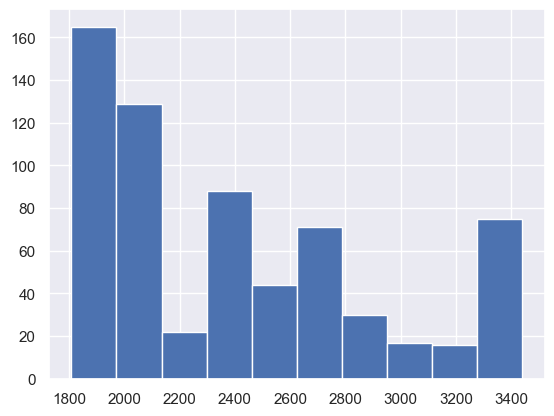

In [13]:
df.gold.hist()

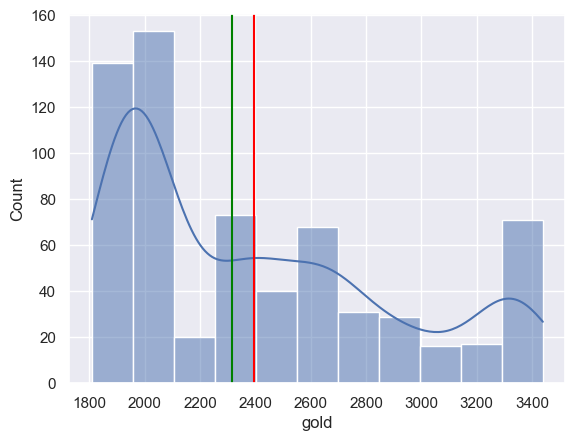

In [14]:
sns.histplot(data=df, x='gold', kde=True)
plt.axvline(df.gold.mean(), color='red')
plt.axvline(df.gold.median(), color='green')

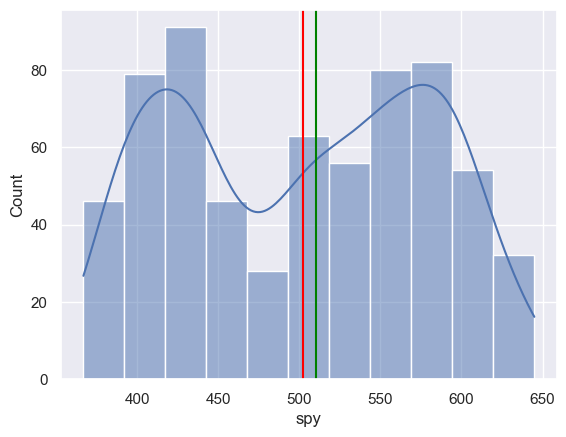

In [15]:
sns.histplot(data=df, x='spy', kde=True)
plt.axvline(df.spy.mean(), color='red')
plt.axvline(df.spy.median(), color='green')

## A Quick look at the prices

In [16]:
px.line(data_frame=df, title='Tickers Adj, Close Prices')

## We need To make Normalization to start each plot from the same price 

 ###                         Norm = df/df.iloc[0, :]
 ### Divide each row on the first row

In [17]:
df.head()

,aapl,msft,tsla,gold,spy
Date,,,,,
2023-01-03,123.33,234.81,108.10,"1,839.70",368.17
2023-01-04,124.60,224.54,113.64,"1,852.80",371.01
2023-01-05,123.28,217.88,110.34,"1,834.80",366.78
2023-01-06,127.82,220.45,113.06,"1,864.20",375.19
2023-01-09,128.34,222.60,119.77,"1,872.70",374.97


In [18]:
norm = df / df.iloc[0, :]
norm.head()

,aapl,msft,tsla,gold,spy
Date,,,,,
2023-01-03,1.00,1.00,1.00,1.00,1.00
2023-01-04,1.01,0.96,1.05,1.01,1.01
2023-01-05,1.00,0.93,1.02,1.00,1.00
2023-01-06,1.04,0.94,1.05,1.01,1.02
2023-01-09,1.04,0.95,1.11,1.02,1.02


In [19]:
fig = px.line(norm)
# Edit Layout
fig.update_layout(title = 'Stock Movement Observation by Normalizing Adj Close Prices, (Daily Cumlative Return) ', 
                 xaxis_title = 'Date',
                 yaxis_title = 'Normalized Price'
                 )
fig.show()

### Ploting Normalization Using Pandas Plot Function

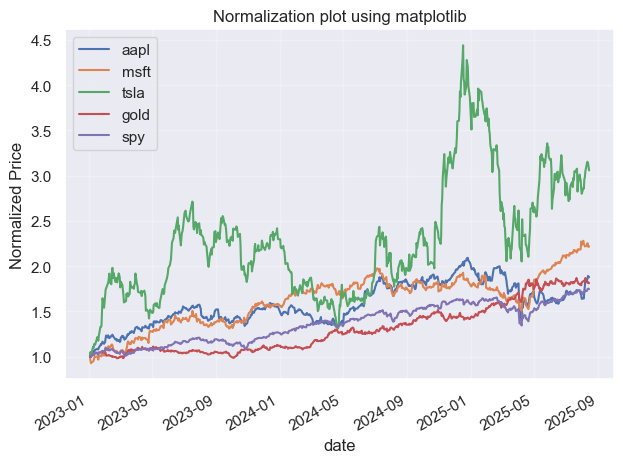

In [20]:
norm.plot()
plt.grid(alpha=0.25)
plt.title('Normalization plot using matplotlib')
plt.xlabel('date')
plt.ylabel('Normalized Price')
plt.tight_layout()

## Rolling Statistics

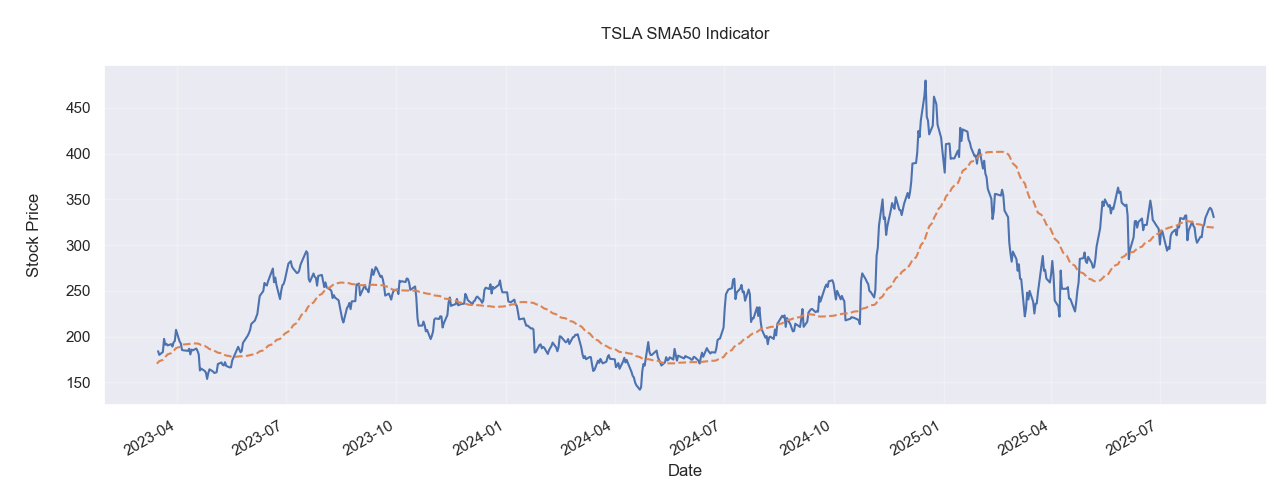

In [21]:
rollingmean = df.tsla.rolling(50).mean()
fig, ax = plt.subplots(figsize=(15,5))
df.iloc[50:]['tsla'].plot(ax=ax)
ax.set_title('\nTSLA SMA50 Indicator\n')
ax.set_xlabel('\nDate\n')
ax.set_ylabel('\nStock Price\n')
rollingmean.plot(ax=ax, linestyle = '--')
plt.grid(alpha=0.25)

<Axes: title={'center': '\nRolling Mean\n'}, xlabel='Date'>

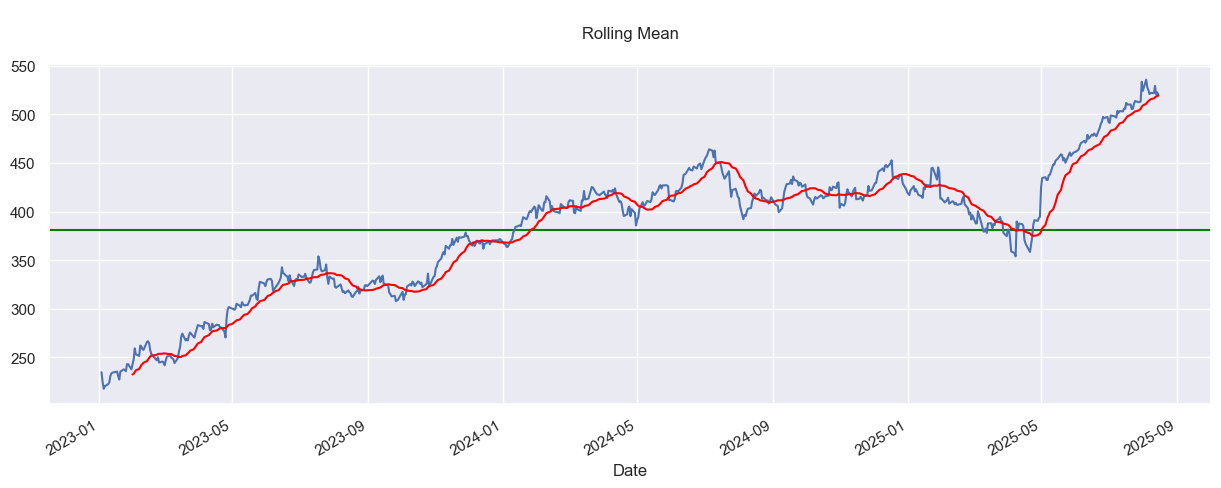

In [22]:
rollingmean = df.msft.rolling(20).mean()
fig, ax = plt.subplots(figsize=(15,5))
plt.title('\nRolling Mean\n')
plt.axhline(df.msft.mean(),color='green')
df.msft.plot(ax=ax)
rollingmean.plot(ax=ax, color='red')

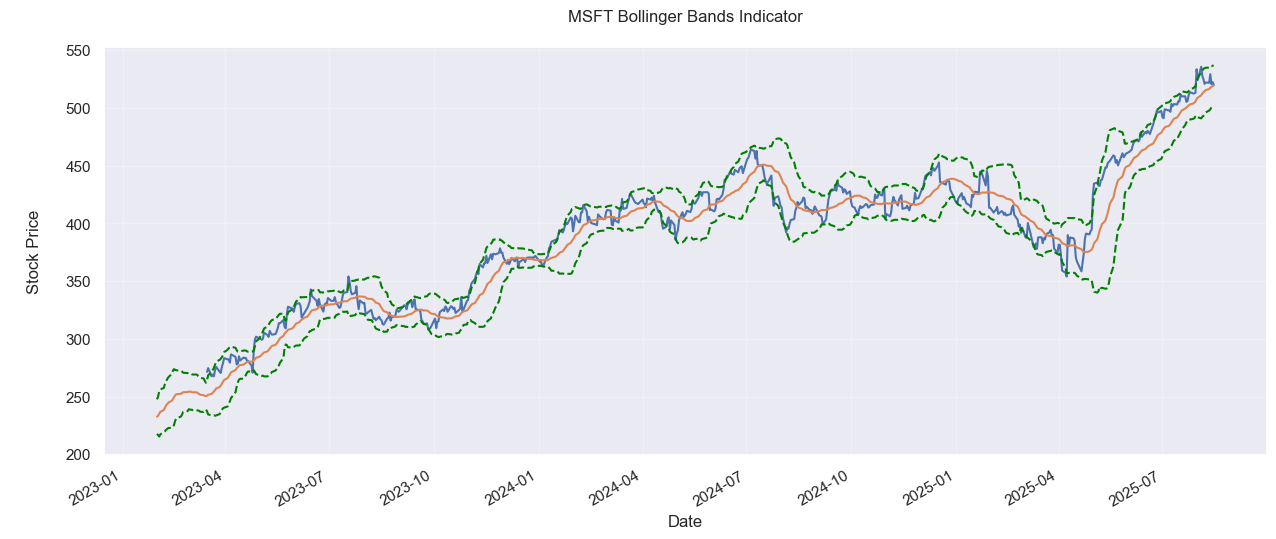

In [23]:
rollingmean = df.msft.rolling(20).mean()
rollingstd = df.msft.rolling(20).std()
lowerbound = rollingmean - (2 * rollingstd)
upperbound = rollingmean + (2 * rollingstd)
fig, ax = plt.subplots(figsize=(15,6))
df.iloc[50:]['msft'].plot()
plt.title('MSFT Bollinger Bands Indicator\n')
plt.xlabel('Date')
plt.ylabel('\nStock Price\n')
rollingmean.plot(linestyle='-')
lowerbound.plot(linestyle='--', color='green')
upperbound.plot(linestyle='--', color='green')
plt.grid(alpha=0.25)

## Metrics

#####  * Daily Returns
#####  * Cummulative Returns
#####  * Sharpe Ratio

### Daily Returns Ratio: is how much did the price go up or down on a particular day

##### DailyReturns(t) = (price[t]/price[t-1]) - 1

In [24]:
df.head()

,aapl,msft,tsla,gold,spy
Date,,,,,
2023-01-03,123.33,234.81,108.10,"1,839.70",368.17
2023-01-04,124.60,224.54,113.64,"1,852.80",371.01
2023-01-05,123.28,217.88,110.34,"1,834.80",366.78
2023-01-06,127.82,220.45,113.06,"1,864.20",375.19
2023-01-09,128.34,222.60,119.77,"1,872.70",374.97


#### * You can get the result using pct_change function

In [25]:
daily_returns = df.pct_change()
daily_returns.iloc[0,:] = 0
daily_returns.head()

,aapl,msft,tsla,gold,spy
Date,,,,,
2023-01-03,0.00,0.00,0.00,0.00,0.00
2023-01-04,0.01,-0.04,0.05,0.01,0.01
2023-01-05,-0.01,-0.03,-0.03,-0.01,-0.01
2023-01-06,0.04,0.01,0.02,0.02,0.02
2023-01-09,0.00,0.01,0.06,0.00,-0.00


In [26]:
daily_returns.describe().T

,count,mean,std,min,25%,50%,75%,max
aapl,657.00,0.00,0.02,-0.09,-0.01,0.00,0.01,0.15
msft,657.00,0.00,0.02,-0.06,-0.01,0.00,0.01,0.10
tsla,657.00,0.00,0.04,-0.15,-0.02,0.00,0.02,0.23
gold,657.00,0.00,0.01,-0.04,-0.00,0.00,0.01,0.03
spy,657.00,0.00,0.01,-0.06,-0.00,0.00,0.01,0.11


### Daily returns Global Statistics

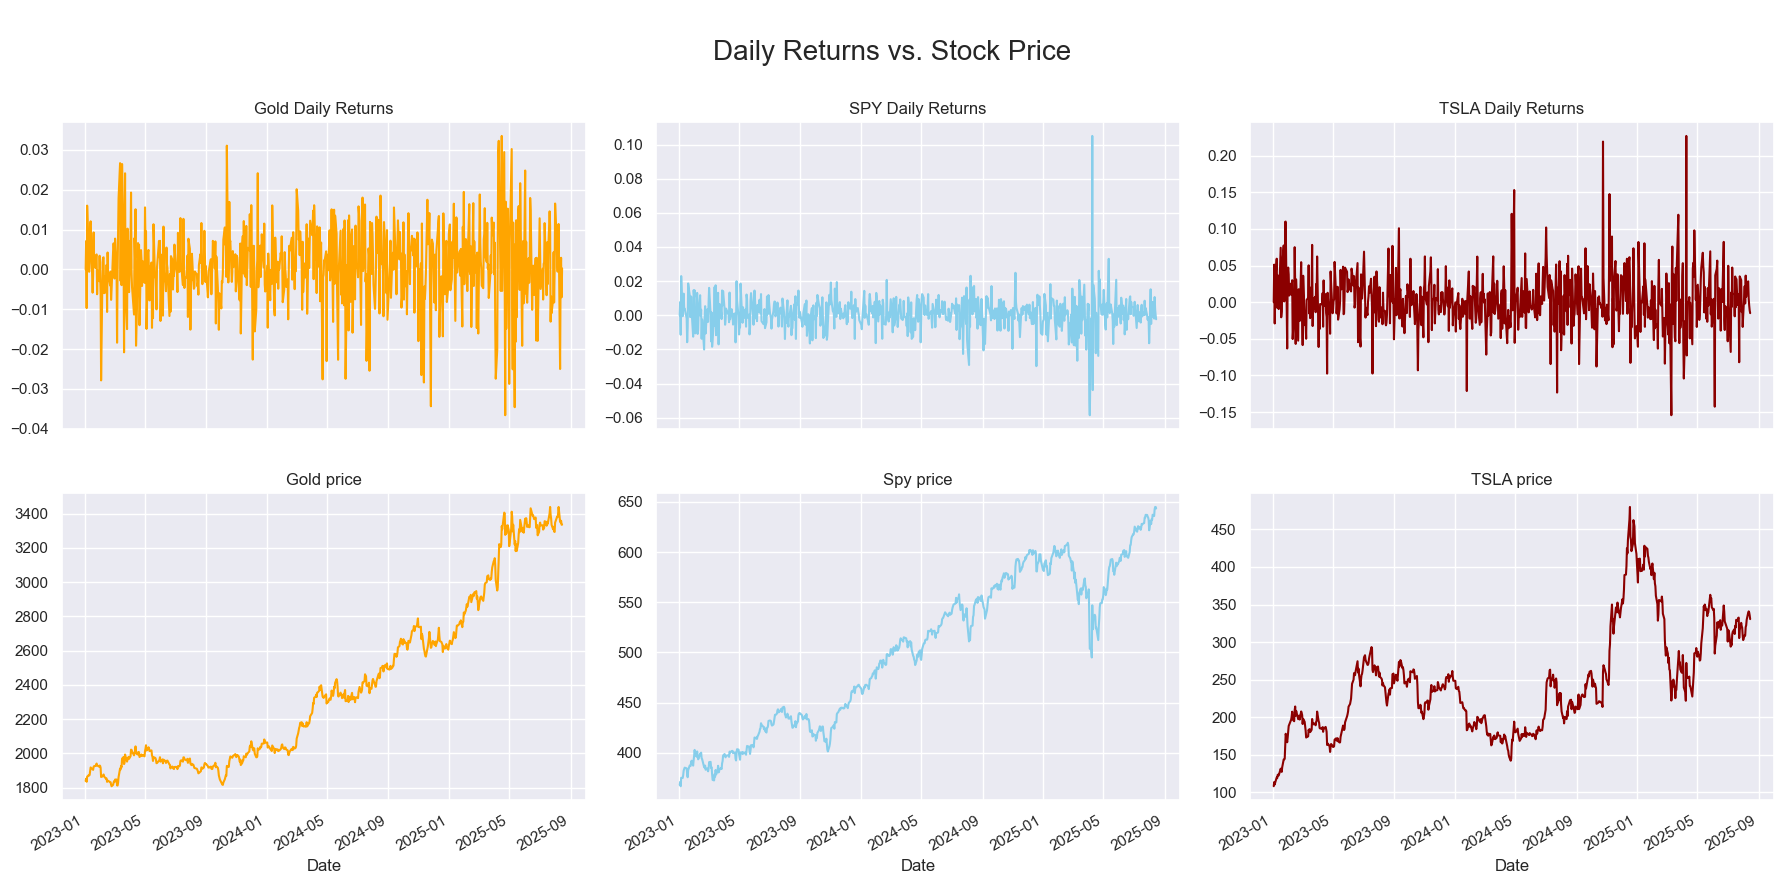

In [27]:
fig, ax = plt.subplots(2,3,figsize=(18,9), sharex=True)

daily_returns.gold.plot(ax=ax[0][0], color='orange')
ax[0][0].set_title('\nGold Daily Returns')

daily_returns.spy.plot(ax=ax[0][1], color='skyblue')
ax[0][1].set_title('\nSPY Daily Returns')

daily_returns.tsla.plot(ax=ax[0][2], color='darkred')
ax[0][2].set_title('\nTSLA Daily Returns')

df.gold.plot(kind='line', ax=ax[1][0], color='orange')
ax[1][0].set_title('\nGold price')

df.spy.plot( ax=ax[1][1], color='skyblue')
ax[1][1].set_title('\nSpy price')

df.tsla.plot( ax=ax[1][2], color='darkred')
ax[1][2].set_title('\nTSLA price')

fig.suptitle('\nDaily Returns vs. Stock Price', fontsize=20)
plt.tight_layout()

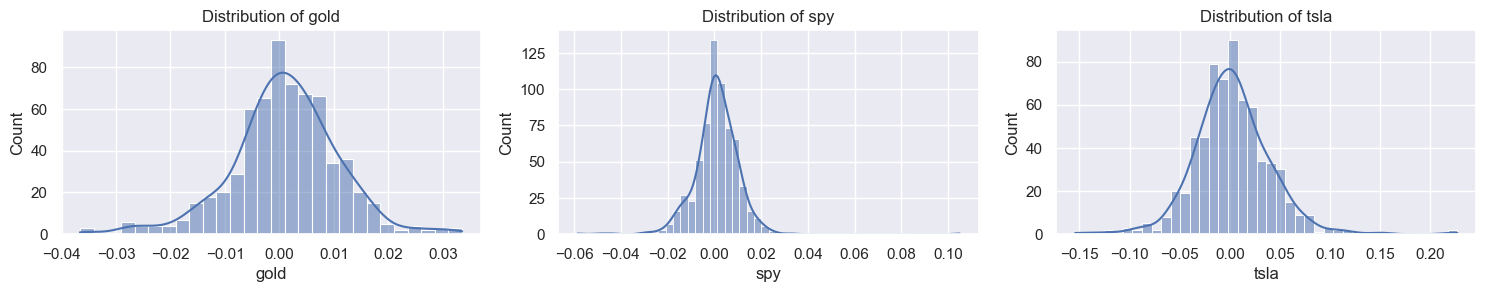

In [28]:
plt.figure(figsize=(20,8))
for e,i in enumerate(daily_returns[['gold','spy','tsla']]):
    plt.subplot(3,4,e+1)
    sns.histplot(daily_returns[i], kde=True)
    plt.title('Distribution of ' + i)
    plt.tight_layout()

### Cummulative Return Ratio is the PROFIT/LOSS ratio
    CR(t) = (Price[t] / price[0]) - 1           OR           CR(t) = (price[t] - price[0]) price[0]

In [29]:
df.head()

,aapl,msft,tsla,gold,spy
Date,,,,,
2023-01-03,123.33,234.81,108.10,"1,839.70",368.17
2023-01-04,124.60,224.54,113.64,"1,852.80",371.01
2023-01-05,123.28,217.88,110.34,"1,834.80",366.78
2023-01-06,127.82,220.45,113.06,"1,864.20",375.19
2023-01-09,128.34,222.60,119.77,"1,872.70",374.97


In [30]:
stocknames = df.columns
for stock in stocknames:
    print('Cummulative Return of {} is: {}%'.format(stock,round(((df.iloc[-1][stock] / df.iloc[0][stock]) - 1) * 100), 2))

Cummulative Return of aapl is: 88%
Cummulative Return of msft is: 122%
Cummulative Return of tsla is: 206%
Cummulative Return of gold is: 81%
Cummulative Return of spy is: 75%


In [31]:
daily_returns.describe()

,aapl,msft,tsla,gold,spy
count,657.00,657.00,657.00,657.00,657.00
mean,0.00,0.00,0.00,0.00,0.00
std,0.02,0.02,0.04,0.01,0.01
min,-0.09,-0.06,-0.15,-0.04,-0.06
25%,-0.01,-0.01,-0.02,-0.00,-0.00
50%,0.00,0.00,0.00,0.00,0.00
75%,0.01,0.01,0.02,0.01,0.01
max,0.15,0.10,0.23,0.03,0.11


<Axes: xlabel='Date'>

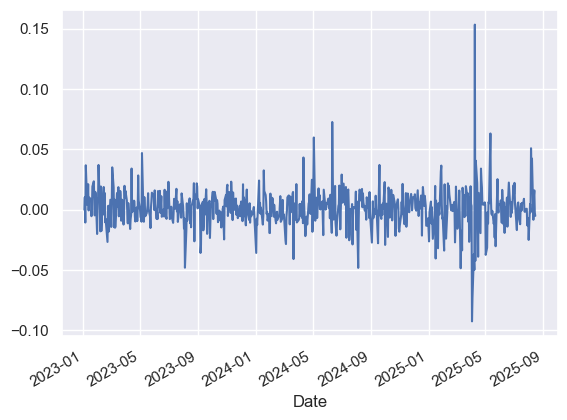

In [32]:
daily_returns.aapl.plot()

#### 
     * Mean
     * STD
     * Kurtosis
     * (Volatility) Risk/Retuen

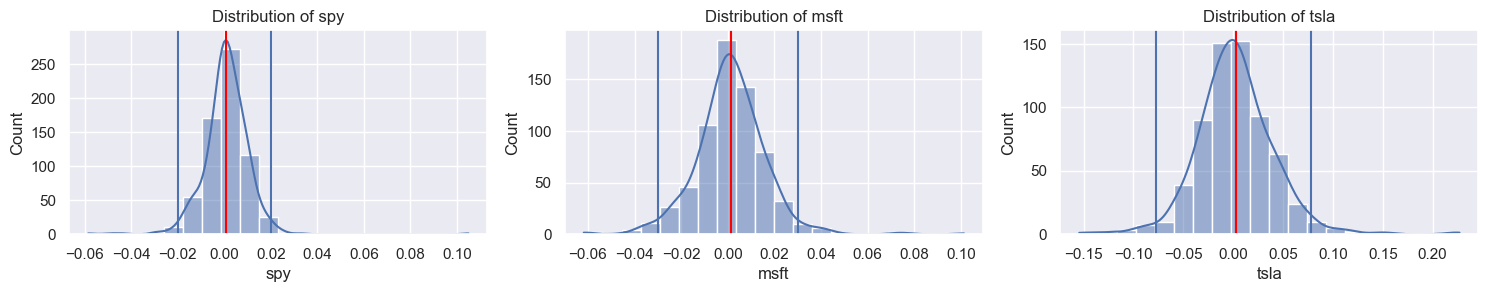

In [33]:
plt.figure(figsize=(20,8))
for e,i in enumerate(daily_returns[['spy','msft','tsla']]):
    plt.subplot(3,4,e+1)
    sns.histplot(daily_returns[i], kde=True, bins = 20)
    plt.axvline(daily_returns[i].mean(), color='red')
    plt.axvline(daily_returns[i].std()*2)
    plt.axvline( - daily_returns[i].std()*2)
    plt.title('Distribution of ' + i)
    plt.tight_layout()

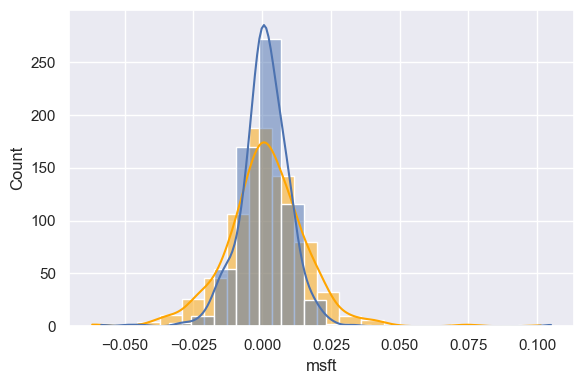

In [34]:
plt.figure(figsize=(6,4))

sns.histplot(daily_returns.msft, kde=True, bins=20, color='orange')
sns.histplot(daily_returns.spy, kde=True, bins=20)
plt.tight_layout()

In [35]:
print(f'The mean of MSFT DR= {daily_returns.msft.mean() * 100}')
print(f'The STD of MSFT DR= {daily_returns.msft.std()}')
print(f'The Kurtosis of MSFT DR= {daily_returns.msft.kurtosis()}')  # Less Kurtosis is best to Trade

The mean of MSFT DR= 0.132375093030314
The STD of MSFT DR= 0.015045836662561244
The Kurtosis of MSFT DR= 5.064823770286466


In [36]:
print(f'The mean of SPY DR= {daily_returns.spy.mean() * 100}')
print(f'The STD of SPY DR= {daily_returns.spy.std()}')
print(f'The Kurtosis of SPY DR= {daily_returns.spy.kurtosis()}')

The mean of SPY DR= 0.08995405710017826
The STD of SPY DR= 0.009981314988300734
The Kurtosis of SPY DR= 20.72829885672482


# Correlations

[[1.         0.70890468]
 [0.70890468 1.        ]]


<Axes: >

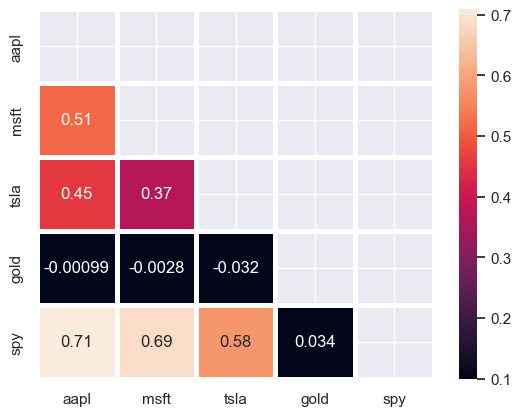

In [38]:
print(np.corrcoef(daily_returns.spy, daily_returns.aapl))
# take the bottom triangle since it repeats itself
mask = np.zeros_like(daily_returns.corr())
mask[np.triu_indices_from(mask)] = True
mask
sns.heatmap(daily_returns.corr(), annot=True, vmin=0.1, mask = mask, linewidths=2.5)

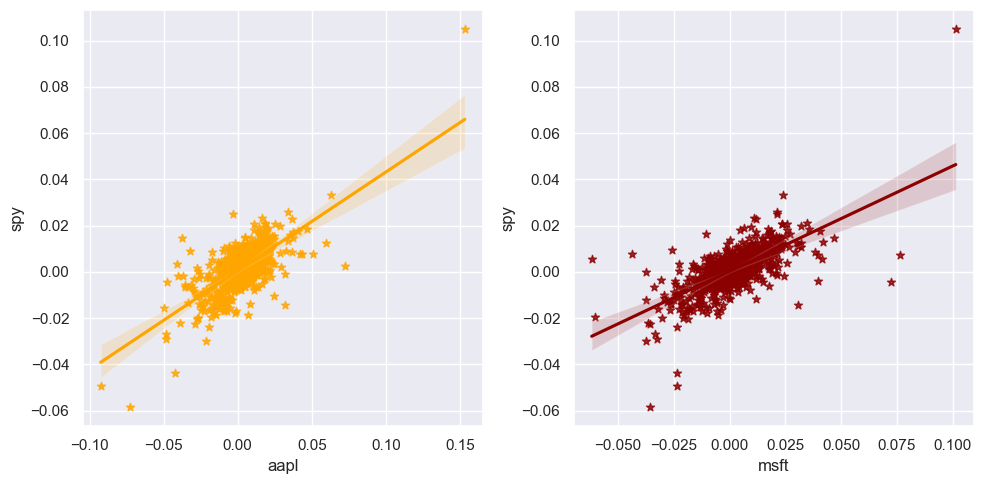

In [40]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.regplot(data=daily_returns, x=daily_returns.aapl, y=daily_returns.spy, scatter=True, marker = '*', ax=ax[0], color= 'orange')
sns.regplot(data=daily_returns, x=daily_returns.msft, y=daily_returns.spy, scatter=True, marker = '*', ax=ax[1], color= 'darkred')
plt.tight_layout()

# Very Strong Correlation

<Axes: xlabel='msft', ylabel='aapl'>

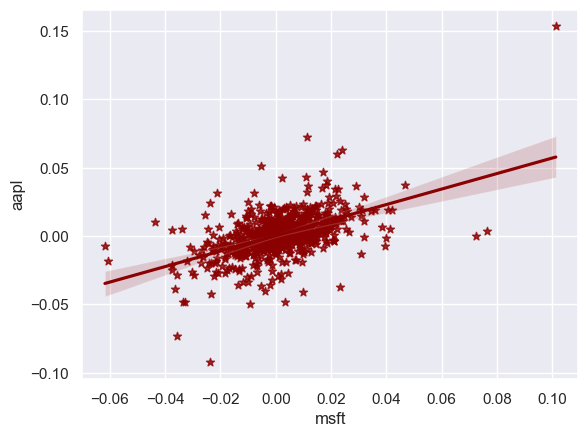

In [41]:
sns.regplot(data=daily_returns, x=daily_returns.msft, y=daily_returns.aapl, scatter=True, marker = '*', color= 'darkred')

## Linear Reg Func.
            y = Bx + a

###### y : Predict value
###### B(Beta = Slop): is how reactive is the market to th stock
###### a(Alpha = Intercept): is how well the market performs with respect of stock

In [43]:
ml = daily_returns.copy()
ml['intercept'] = 1
lm = sm.OLS(ml.spy, ml[['intercept', 'aapl']])
res = lm.fit()
res.summary()

# watch : R-squared, coef and P>|t|

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     661.7
Date:                Tue, 19 Aug 2025   Prob (F-statistic):          2.13e-101
Time:                        08:41:22   Log-Likelihood:                 2324.5
No. Observations:                 657   AIC:                            -4645.
Df Residuals:                     655   BIC:                            -4636.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.000      1.567      0.118      -0.000       0.001
aapl           0.4273      0.017     25.724      0.000       0.395       0.460
==============================================================================
Omnibus:                       51.765   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.233
Skew:                           0.019   Prob(JB):                     7.58e-55
Kurtosis:                       6.017   Cond. No.                         60.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### When AAPL price goes up to 1%, SPY goes up by 43%
#### 50% of the variability in SPY price can be explained by AAPL Price

In [44]:
ml = daily_returns.copy()
ml['intercept'] = 1
lm = sm.OLS(ml.spy, ml[['intercept', 'msft']])
res = lm.fit()
res.summary()

# watch : R-squared, coef and P>|t|

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     581.7
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           1.79e-92
Time:                        08:47:42   Log-Likelihood:                 2303.9
No. Observations:                 657   AIC:                            -4604.
Df Residuals:                     655   BIC:                            -4595.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.000      1.044      0.297      -0.000       0.001
msft           0.4550      0.019     24.119      0.000       0.418       0.492
==============================================================================
Omnibus:                      137.676   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3698.039
Skew:                          -0.003   Prob(JB):                         0.00
Kurtosis:                      14.623   Cond. No.                         66.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### When MSFT price goes up to 1%, SPY goes up by 46%
#### 47% of the variability in SPY price can be explained by MSFT Price

In [45]:
slop, intercept, r, p, std_err = stats.linregress(daily_returns.aapl, daily_returns.spy)
print('AAPL/SPY\n' , 'beta (slop) = ', slop, '\nalpha (Intercept) = ', intercept, '\nR-Squared = ', r**2, '\nPvalue = ', p)

print('-' * 50)

slop, intercept, r, p, std_err = stats.linregress(daily_returns.msft, daily_returns.spy)
print('MSFT/SPY\n' , 'beta (slop) = ', slop, '\nalpha (Intercept) = ', intercept, '\nR-Squared = ', r**2, '\nPvalue = ', p)

AAPL/SPY
 beta (slop) =  0.4272662058534461 
alpha (Intercept) =  0.0004315612256349843 
R-Squared =  0.5025458432295624 
Pvalue =  2.1332534078524906e-101
--------------------------------------------------
MSFT/SPY
 beta (slop) =  0.45498610820722435 
alpha (Intercept) =  0.0002972522869874641 
R-Squared =  0.4703849704882812 
Pvalue =  1.7934299948641127e-92
